In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from IPython.display import display

In [2]:
# Read the data form the excel file

# Read Excel file into a DataFrame
data = pd.read_excel('shs_ipat_data.xlsx', sheet_name='Germany', index_col=0, na_values=['nan', '0'])


# Separate the data for with the factors for the ipat decomposition

ipat = data[['CD', 'Population', 'HH / Pop', 'DW / HH', 'new DW / tot DW', 'sqm / new DW [sqm]','CD / sqm [t / sqm]', 'DW / Pop', 'Rooms / new DW', 'sqm / Rooms', 'new DW']].copy()

#Check that all the values are floats and in case they are not, convert them to floats
for column in ipat.columns:
    ipat[column] = pd.to_numeric(ipat[column], errors='coerce')

# Remove rows with invalid values
ipat = ipat.dropna()

display(ipat)


,CD,Population,HH / Pop,DW / HH,new DW / tot DW,sqm / new DW [sqm],CD / sqm [t / sqm],DW / Pop,Rooms / new DW,sqm / Rooms,new DW
Year,,,,,,,,,,,
2015.0,8.1662,82176000.0,0.496179,0.090030,0.059040,108.952738,0.345835,0.044671,4.354423,25.021166,216727.0
2016.0,8.6350,82522000.0,0.496352,0.090283,0.063726,105.559752,0.347122,0.044812,4.193306,25.173399,235658.0
2017.0,9.1296,82792000.0,0.498889,0.090207,0.065837,104.368457,0.356597,0.045003,4.096109,25.479900,245304.0
2018.0,9.2800,83019000.0,0.498416,0.090718,0.066957,102.555125,0.360025,0.045215,3.997724,25.653377,251338.0
2019.0,9.4710,83167000.0,0.499068,0.091137,0.067656,103.159129,0.358736,0.045484,3.989638,25.856767,255925.0
2020.0,9.3912,83155000.0,0.494330,0.092758,0.070490,103.235432,0.338458,0.045853,3.976661,25.960332,268774.0
2021.0,8.7882,83237000.0,0.500967,0.092123,0.066733,100.818406,0.340035,0.046151,3.869508,26.054583,256352.0
2022.0,8.6800,84359000.0,0.494541,0.092771,0.066866,101.242687,0.331285,0.045879,3.862497,26.211721,258794.0


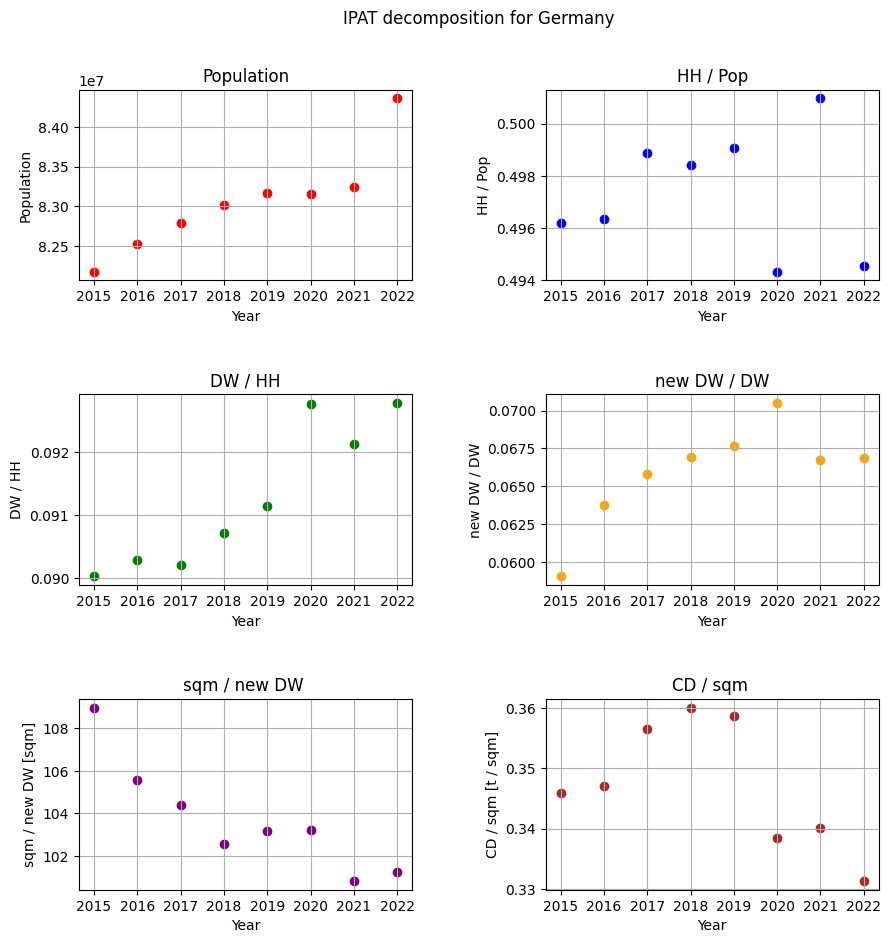

In [3]:
# Plots graphs for every column in the ipat decomposition with nice different colors

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('IPAT decomposition for Germany')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

axs[0, 0].scatter(ipat.index, ipat['Population'], color='red', marker='o')
axs[0, 0].set_title('Population')
axs[0,0].set_ylabel('Population')
axs[0,0].set_xlabel('Year')
axs[0,0].set_xticks(range(int(axs[0,0].get_xlim()[0])+1, int(axs[0,0].get_xlim()[1]) + 1))
axs[0,0].grid()

axs[0, 1].scatter(ipat.index, ipat['HH / Pop'], color='blue', marker='o')
axs[0, 1].set_title('HH / Pop')
axs[0,1].set_ylabel('HH / Pop')
axs[0,1].set_xlabel('Year')
axs[0,1].set_xticks(range(int(axs[0,1].get_xlim()[0])+1, int(axs[0,1].get_xlim()[1]) + 1))
axs[0,1].grid()

axs[1, 0].scatter(ipat.index, ipat['DW / HH'], color='green', marker='o')
axs[1, 0].set_title('DW / HH')
axs[1,0].set_ylabel('DW / HH')
axs[1,0].set_xlabel('Year')
axs[1,0].set_xticks(range(int(axs[1,0].get_xlim()[0])+1, int(axs[1,0].get_xlim()[1]) + 1))
axs[1,0].grid()

axs[1, 1].scatter(ipat.index, ipat['new DW / tot DW'], color='orange', marker='o')
axs[1, 1].set_title('new DW / DW')
axs[1,1].set_ylabel('new DW / DW')
axs[1,1].set_xlabel('Year')
axs[1,1].set_xticks(range(int(axs[1,1].get_xlim()[0])+1, int(axs[1,1].get_xlim()[1]) + 1))
axs[1,1].grid()

axs[2, 0].scatter(ipat.index, ipat['sqm / new DW [sqm]'], color='purple', marker='o')
axs[2, 0].set_title('sqm / new DW ')
axs[2,0].set_ylabel('sqm / new DW [sqm]')
axs[2,0].set_xlabel('Year')
axs[2,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[2,0].grid()

axs[2, 1].scatter(ipat.index, ipat['CD / sqm [t / sqm]'], color='brown', marker='o')
axs[2, 1].set_title('CD / sqm ')
axs[2,1].set_ylabel('CD / sqm [t / sqm]')
axs[2,1].set_xlabel('Year')
axs[2,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[2,1].grid()

plt.show()

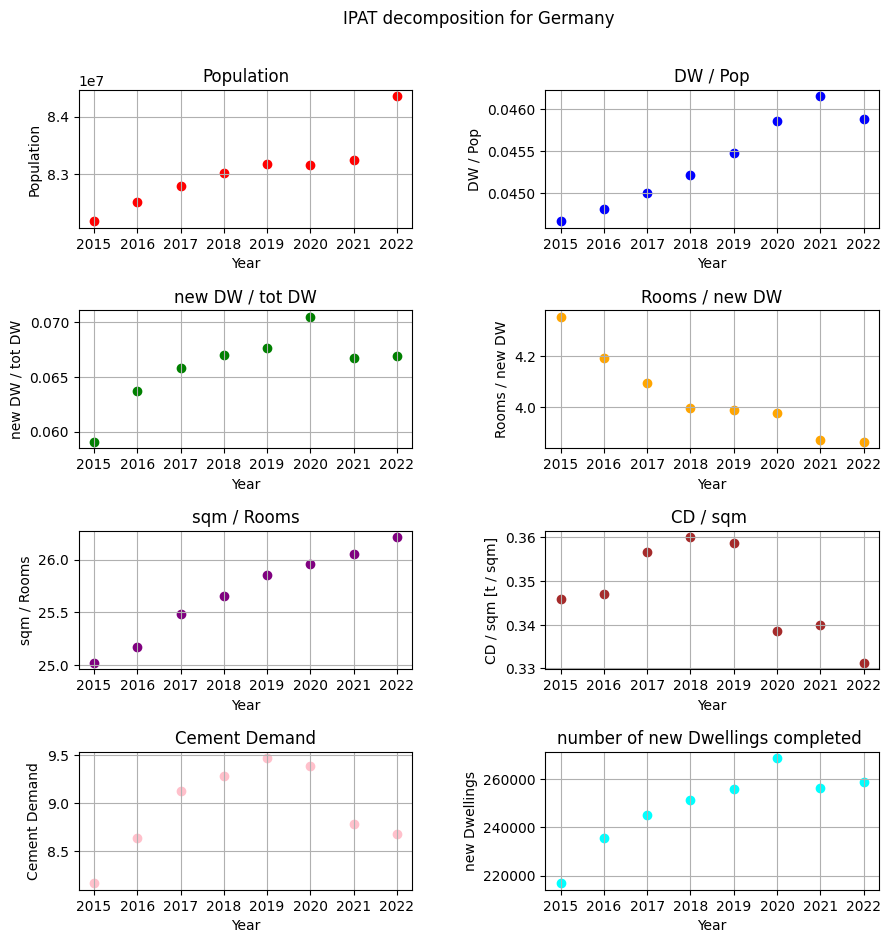

In [5]:
# Plots graphs for every column in the ipat decomposition with nice different colors

fig, axs = plt.subplots(4, 2, figsize=(10, 10))
fig.suptitle('IPAT decomposition for Germany')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

axs[0, 0].scatter(ipat.index, ipat['Population'], color='red', marker='o')
axs[0, 0].set_title('Population')
axs[0,0].set_ylabel('Population')
axs[0,0].set_xlabel('Year')
axs[0,0].set_xticks(range(int(axs[0,0].get_xlim()[0])+1, int(axs[0,0].get_xlim()[1]) + 1))
axs[0,0].grid()

axs[0, 1].scatter(ipat.index, ipat['DW / Pop'], color='blue', marker='o')
axs[0, 1].set_title('DW / Pop')
axs[0,1].set_ylabel('DW / Pop')
axs[0,1].set_xlabel('Year')
axs[0,1].set_xticks(range(int(axs[0,1].get_xlim()[0])+1, int(axs[0,1].get_xlim()[1]) + 1))
axs[0,1].grid()

axs[1, 0].scatter(ipat.index, ipat['new DW / tot DW'], color='green', marker='o')
axs[1, 0].set_title('new DW / tot DW')
axs[1,0].set_ylabel('new DW / tot DW')
axs[1,0].set_xlabel('Year')
axs[1,0].set_xticks(range(int(axs[1,0].get_xlim()[0])+1, int(axs[1,0].get_xlim()[1]) + 1))
axs[1,0].grid()

axs[1, 1].scatter(ipat.index, ipat['Rooms / new DW'], color='orange', marker='o')
axs[1, 1].set_title('Rooms / new DW')
axs[1,1].set_ylabel('Rooms / new DW')
axs[1,1].set_xlabel('Year')
axs[1,1].set_xticks(range(int(axs[1,1].get_xlim()[0])+1, int(axs[1,1].get_xlim()[1]) + 1))
axs[1,1].grid()

axs[2, 0].scatter(ipat.index, ipat['sqm / Rooms'], color='purple', marker='o')
axs[2, 0].set_title('sqm / Rooms')
axs[2,0].set_ylabel('sqm / Rooms')
axs[2,0].set_xlabel('Year')
axs[2,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[2,0].grid()

axs[2, 1].scatter(ipat.index, ipat['CD / sqm [t / sqm]'], color='brown', marker='o')
axs[2, 1].set_title('CD / sqm ')
axs[2,1].set_ylabel('CD / sqm [t / sqm]')
axs[2,1].set_xlabel('Year')
axs[2,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[2,1].grid()

axs[3, 0].scatter(ipat.index, ipat['CD'], color='pink', marker='o')
axs[3, 0].set_title('Cement Demand')
axs[3,0].set_ylabel('Cement Demand')
axs[3,0].set_xlabel('Year')
axs[3,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[3,0].grid()

axs[3, 1].scatter(ipat.index, ipat['new DW'], color='cyan', marker='o')
axs[3, 1].set_title('number of new Dwellings completed ')
axs[3,1].set_ylabel('new Dwellings')
axs[3,1].set_xlabel('Year')
axs[3,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[3,1].grid()

plt.show()

# Interpretations

I used Pietros code (thx for the initiative 😍) to also do the analysis for an IPAT looking at how many rooms new dwellings have and to me it looks pretty interesting. From this I feel like we can argue that 
- new DW have less rooms, which are larger
- total CD stays (more less) constant

In [6]:
# Compute a linear regression for every column in the ipat decomposition, computing also the CHI squared value and saves the data in a dictionary

ipat_regression = {}

for column in ipat.columns:
    slope, intercept, r_value, p_value, std_err = linregress(ipat.index, ipat[column])
    ipat_regression[column] = {'slope': slope, 'intercept': intercept, 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}

# moves the dictionary into a dataframe and plots it

ipat_regression_df = pd.DataFrame(ipat_regression).T
display(ipat_regression_df)


,slope,intercept,r_value,p_value,std_err
CD,0.063552,-1.193378e+02,0.345695,0.401610,0.070425
Population,239202.380952,-3.997766e+08,0.912953,0.001543,43648.631079
HH / Pop,-0.000017,5.313618e-01,-0.017509,0.967178,0.000393
DW / HH,0.000434,-7.849564e-01,0.929570,0.000828,0.000070
new DW / tot DW,0.001006,-1.964153e+00,0.734740,0.037871,0.000379
sqm / new DW [sqm],-0.958002,2.037463e+03,-0.899440,0.002354,0.190039
CD / sqm [t / sqm],-0.002297,4.984734e+00,-0.537011,0.169936,0.001473
DW / Pop,0.000214,-3.863959e-01,0.963109,0.000122,0.000024
Rooms / new DW,-0.064630,1.344978e+02,-0.950033,0.000300,0.008669
sqm / Rooms,0.171244,-3.199794e+02,0.987024,0.000005,0.011373


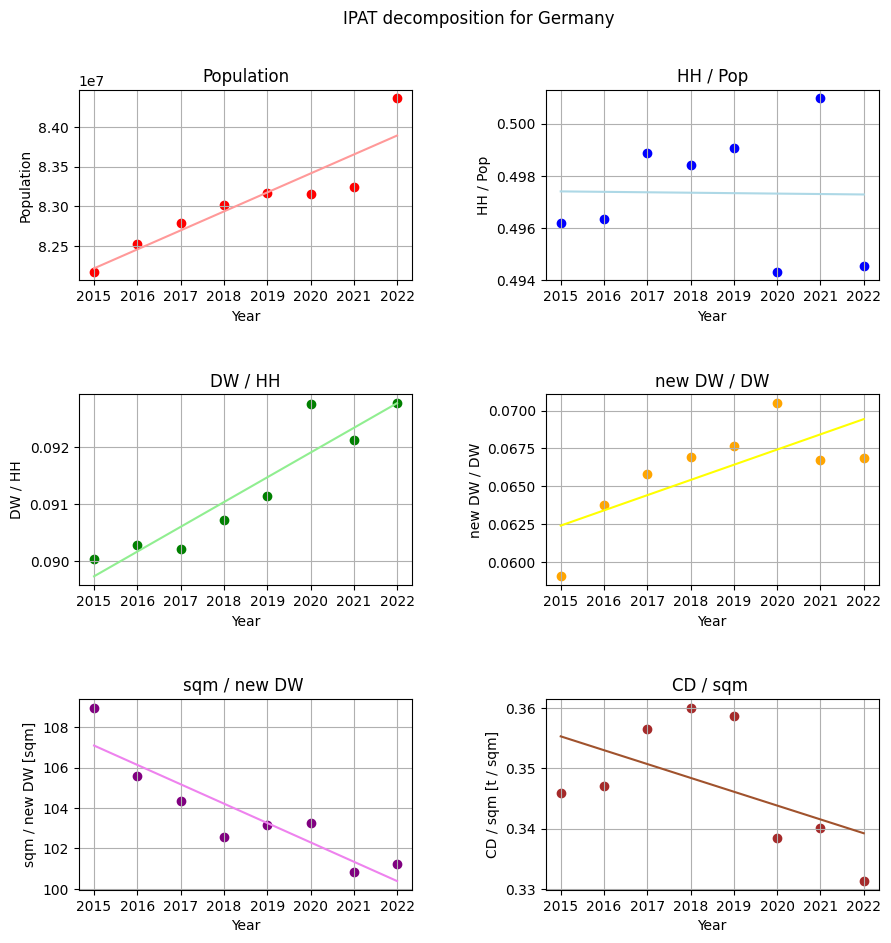

In [7]:
# Redoes the plots with the linear regression

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('IPAT decomposition for Germany')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

axs[0, 0].scatter(ipat.index,ipat['Population'], color='red', marker='o')
axs[0, 0].plot(ipat.index, ipat_regression_df['slope']['Population']*ipat.index + ipat_regression_df['intercept']['Population'], color=(1.0, 0.6, 0.6))
axs[0, 0].set_title('Population')
axs[0,0].set_ylabel('Population')
axs[0,0].set_xlabel('Year')
axs[0,0].set_xticks(range(int(axs[0,0].get_xlim()[0])+1, int(axs[0,0].get_xlim()[1]) + 1))
axs[0,0].grid()

axs[0, 1].scatter(ipat.index,ipat['HH / Pop'], color='blue', marker='o')
axs[0, 1].plot(ipat.index, ipat_regression_df['slope']['HH / Pop']*ipat.index + ipat_regression_df['intercept']['HH / Pop'], color='lightblue')
axs[0, 1].set_title('HH / Pop')
axs[0,1].set_ylabel('HH / Pop')
axs[0,1].set_xlabel('Year')
axs[0,1].set_xticks(range(int(axs[0,1].get_xlim()[0])+1, int(axs[0,1].get_xlim()[1]) + 1))
axs[0,1].grid()

axs[1, 0].scatter(ipat.index,ipat['DW / HH'], color='green', marker='o')
axs[1, 0].plot(ipat.index, ipat_regression_df['slope']['DW / HH']*ipat.index + ipat_regression_df['intercept']['DW / HH'], color='lightgreen')
axs[1, 0].set_title('DW / HH')
axs[1,0].set_ylabel('DW / HH')
axs[1,0].set_xlabel('Year')
axs[1,0].set_xticks(range(int(axs[1,0].get_xlim()[0])+1, int(axs[1,0].get_xlim()[1]) + 1))
axs[1,0].grid()

axs[1, 1].scatter(ipat.index,ipat['new DW / tot DW'], color='orange', marker='o')
axs[1, 1].plot(ipat.index, ipat_regression_df['slope']['new DW / tot DW']*ipat.index + ipat_regression_df['intercept']['new DW / tot DW'], color='yellow')
axs[1, 1].set_title('new DW / DW')
axs[1,1].set_ylabel('new DW / DW')
axs[1,1].set_xlabel('Year')
axs[1,1].set_xticks(range(int(axs[1,1].get_xlim()[0])+1, int(axs[1,1].get_xlim()[1]) + 1))
axs[1,1].grid()

axs[2, 0].scatter(ipat.index,ipat['sqm / new DW [sqm]'], color='purple',marker='o')
axs[2, 0].plot(ipat.index, ipat_regression_df['slope']['sqm / new DW [sqm]']*ipat.index + ipat_regression_df['intercept']['sqm / new DW [sqm]'], color='violet')
axs[2, 0].set_title('sqm / new DW ')
axs[2,0].set_ylabel('sqm / new DW [sqm]')
axs[2,0].set_xlabel('Year')
axs[2,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[2,0].grid()

axs[2, 1].scatter(ipat.index,ipat['CD / sqm [t / sqm]'], color='brown', marker='o')
axs[2, 1].plot(ipat.index, ipat_regression_df['slope']['CD / sqm [t / sqm]']*ipat.index + ipat_regression_df['intercept']['CD / sqm [t / sqm]'], color='sienna')
axs[2, 1].set_title('CD / sqm ')
axs[2,1].set_ylabel('CD / sqm [t / sqm]')
axs[2,1].set_xlabel('Year')
axs[2,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[2,1].grid()

plt.show()



# IPAT

$$
\text{CD}_\text{PH} = \text{Pop} \times \frac{\text{DW}_\text{tot}}{\text{Pop}} \times \frac{\text{DW}_\text{new}}{\text{DW}_\text{tot}} \times \frac{\text{LR}_\text{new}}{\text{DW}_\text{new}} \times \frac{\text{A}_\text{new}}{\text{LR}_\text{new}} \times \frac{\text{CD}_\text{PH}}{\text{A}_\text{new}}
$$


In [8]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
cols = ['CD', 'Pop', 'tot DW', 'new DW', 'new Rooms', 'new sqm']

data = pd.read_excel('shs_ipat_data.xlsx', sheet_name='Germany', index_col=0, na_values=['nan', '0'])[cols]
data = data.loc[years]

In [9]:
data['CD'] *= 1_000_000
data['Pop'] *= 1_000
data['new sqm'] *= 1_000

In [96]:
data['tot DW / Pop'] = data['tot DW'] / data['Pop']
data['new DW / tot DW'] = data['new DW'] / data['tot DW']
data['new LR / new DW'] = data['new Rooms'] / data['new DW']
data['new sqm / new LR'] = data['new sqm'] / data['new Rooms']
data['CD / new sqm'] = data['CD'] / data['new sqm']

ipat_factors = ['Pop', 'tot DW / Pop', 'new DW / tot DW', 'new LR / new DW', 'new sqm / new LR', 'CD / new sqm']

ipat_labels = [
    r"$\text{Pop}$",
    r"$\text{DW}_\text{tot} / \text{Pop}$",
    r"$\text{DW}_\text{new} / \text{DW}_\text{tot}$",
    r"$\text{LR}_\text{new} / \text{DW}_\text{new}$",
    r"$\text{A}_\text{new} / \text{LR}_\text{new}$",
    r"$\text{CD} / \text{A}_\text{new}$",
]

# https://coolors.co/b51f1f-d98336-fde74c-bbbdf6-007480-32de8a

color_other = "#CAC7C7"
color_cement = "#4F8FCC"
colors_ipat = ["#B51F1F", "#D98336", "#FDE74C", "#BBBDF6", "#007480", "#32DE8A"]

In [97]:
def plot(
    ax,
    data1,
    title="",
    xlabel="",
    ylabel="",
    marker="x",
    label="",
    color="tab:blue",
    data2=None,
    ylabel2="",
    marker2="o",
    label2="",
    color2="tab:red",
    two_axis=False,
):
    ax: plt.Axes
    plts =  ax.plot(data1.index, data1, marker=marker, color=color, label=label)
    if two_axis:
        ax2 = ax.twinx()
        ax2.set_ylabel(ylabel2)
    else:
        ax2 = ax
    if data2 is not None:
        plts += ax2.plot(data2.index, data2, marker=marker2, color=color2, label=label2)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_xticks(data1.index)
    
    if label:
        ax.legend(plts, [label, label2] if data2 is not None else [label])
    
    ax.grid()

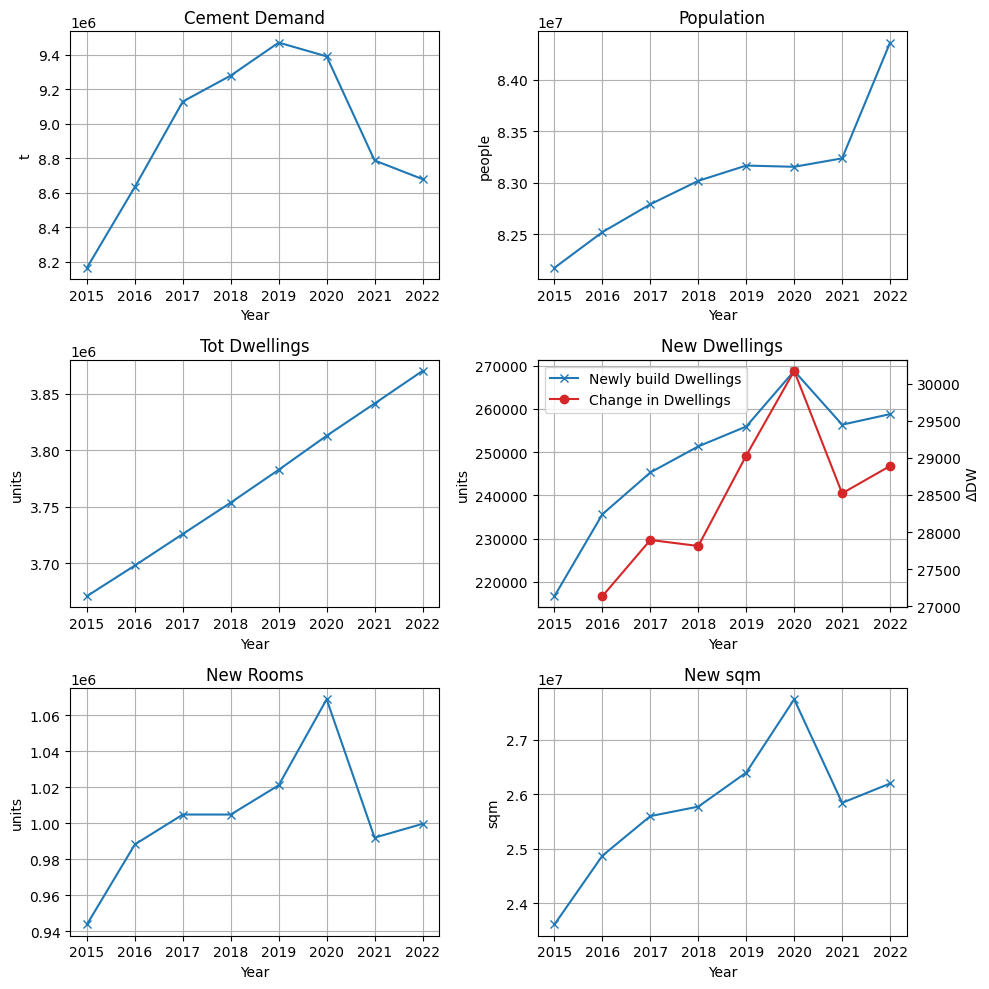

In [98]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

axs = axs.flatten()

plot(axs[0], data.loc[years, "CD"], title="Cement Demand", ylabel="t", xlabel="Year")
plot(axs[1], data.loc[years, "Pop"], title="Population", ylabel="people", xlabel="Year")
plot(
    axs[2],
    data.loc[years, "tot DW"],
    title="Tot Dwellings",
    ylabel="units",
    xlabel="Year",
)
plot(
    axs[3],
    data.loc[years, "new DW"],
    title="New Dwellings",
    ylabel="units",
    xlabel="Year",
    label="Newly build Dwellings",
    data2=data.loc[years, "tot DW"] - data.loc[years, "tot DW"].shift(1),
    ylabel2=r"$\Delta$DW",
    label2="Change in Dwellings",
    two_axis=True,
)
plot(
    axs[4],
    data.loc[years, "new Rooms"],
    title="New Rooms",
    ylabel="units",
    xlabel="Year",
)
plot(axs[5], data.loc[years, "new sqm"], title="New sqm", ylabel="sqm", xlabel="Year")

fig.tight_layout()

plt.show()

In [99]:
def calc_change(col, start=years[0], end=years[-1]):
    return (data.loc[end, col] - data.loc[start, col]) / data.loc[start, col]

def calc_cd(col, start=years[0], end=years[-1]):
    return calc_change(col, start, end) * data.loc[start, "CD"]

In [100]:
def waterfall(ax, x, values, colors, title="", text=[], bottom=None, labels=[], ylim=None, width=0.1):
    ax: plt.Axes
    y = 0
    if bottom is None:
        bottom = []
        for val in values:
            bottom.append(y)
            y += val
    ax.bar(x, values, width, bottom=bottom, color=colors)
    
    for i in range(len(values) - 1):
        ax.plot([x[i] -width/2, x[i +1] +width/2], [values[i] + bottom[i], values[i] + bottom[i]], color="black")
        
    for i, t in enumerate(text):
        ax.text(x[i], max(bottom[i], bottom[i] + values[i]), t, ha="center", va="bottom")
       
    ax.set_xticks(list(range(len(labels))))
    ax.set_xticklabels(labels) 
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_title(title)
    
    # ax.set_yticks([])
    # ax.set_xticks([])

In [101]:
for i in range(7):
    print(f"Year: {years[i]}")
    diff_from_data = data.loc[years[i+1], "CD"] - data.loc[years[i], "CD"]
    diff_calc = 0
    for factor in ipat_factors:
        diff_calc += calc_cd(factor, start=years[i], end=years[i+1])
        print(f"{factor:<20}: {calc_cd(factor, start=years[i], end=years[i+1]):+1.2e}")
    print(f"{'CD':<20}: {diff_from_data:+1.2e}")
    print(f"{'Sum':<20}: {diff_calc:+1.2e}")
    print()


Year: 2015
Pop                 : +3.44e+04
tot DW / Pop        : +2.59e+04
new DW / tot DW     : +6.48e+05
new LR / new DW     : -3.02e+05
new sqm / new LR    : +4.97e+04
CD / new sqm        : +3.04e+04
CD                  : +4.69e+05
Sum                 : +4.86e+05

Year: 2016
Pop                 : +2.83e+04
tot DW / Pop        : +3.68e+04
new DW / tot DW     : +2.86e+05
new LR / new DW     : -2.00e+05
new sqm / new LR    : +1.05e+05
CD / new sqm        : +2.36e+05
CD                  : +4.95e+05
Sum                 : +4.92e+05

Year: 2017
Pop                 : +2.50e+04
tot DW / Pop        : +4.30e+04
new DW / tot DW     : +1.55e+05
new LR / new DW     : -2.19e+05
new sqm / new LR    : +6.22e+04
CD / new sqm        : +8.78e+04
CD                  : +1.50e+05
Sum                 : +1.54e+05

Year: 2018
Pop                 : +1.65e+04
tot DW / Pop        : +5.51e+04
new DW / tot DW     : +9.68e+04
new LR / new DW     : -1.88e+04
new sqm / new LR    : +7.36e+04
CD / new sqm        : -3.

In [102]:
ipat_factors

['Pop',
 'tot DW / Pop',
 'new DW / tot DW',
 'new LR / new DW',
 'new sqm / new LR',
 'CD / new sqm']

In [121]:
ipat_labels

['$\\text{Pop}$',
 '$\\text{DW}_\\text{tot} / \\text{Pop}$',
 '$\\text{DW}_\\text{new} / \\text{DW}_\\text{tot}$',
 '$\\text{LR}_\\text{new} / \\text{DW}_\\text{new}$',
 '$\\text{A}_\\text{new} / \\text{LR}_\\text{new}$',
 '$\\text{CD} / \\text{A}_\\text{new}$']

In [120]:
print(
    len([data.loc[years[0], "CD"], *ipat_values, diff, -data.loc[years[-1], "CD"]]),
    len([color_cement, *colors_ipat, color_other, color_cement]),
    len(labels),
    len(np.arange(len(labels))),
    len(["", *[f"{calc_change(factor, start=years[0], end=years[-1])*100:+2.1f}" for factor in ipat_factors], other_text, ""]),
)

9 8 8 8 9


In [124]:
ipat_values, diff

([216934.56240264798,
  220910.29158187163,
  1082536.975843836,
  -922548.524790205,
  388563.23076080525,
  -343565.7493988783],
 8037169.213599922)

In [130]:
f"{calc_change('CD', start=years[0], end=years[-1]) * 100:+2.1f}"

'+6.3'

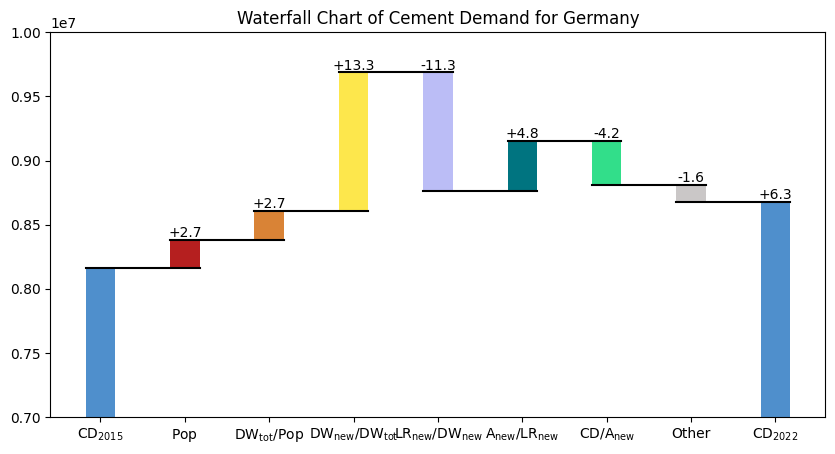

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

labels = [
    r"$\text{CD}_{2015}$",
    *ipat_labels,
    'Other',
    r"$\text{CD}_{2022}$",
]

ipat_values = [calc_cd(factor, start=years[0], end=years[-1]) for factor in ipat_factors]
diff = (data.loc[years[-1], "CD"] - (sum(ipat_values) + data.loc[years[0], "CD"]))
other_text = f"{diff / data.loc[years[0], 'CD']*100:+2.1f}"

waterfall(
    ax,
    np.arange(len(labels)),
    [data.loc[years[0], "CD"], *ipat_values, diff, -data.loc[years[-1], "CD"]],
    text=["", *[f"{calc_change(factor, start=years[0], end=years[-1])*100:+2.1f}"for factor in ipat_factors], other_text, f"{calc_change('CD', start=years[0], end=years[-1]) * 100:+2.1f}"],
    colors=[color_cement, *colors_ipat, color_other, color_cement],
    labels=labels,
    title="Waterfall Chart of Cement Demand for Germany",
    width=0.35,
    ylim=(7e6, 1e7),
)

fig.savefig("waterfall.png")

plt.show()

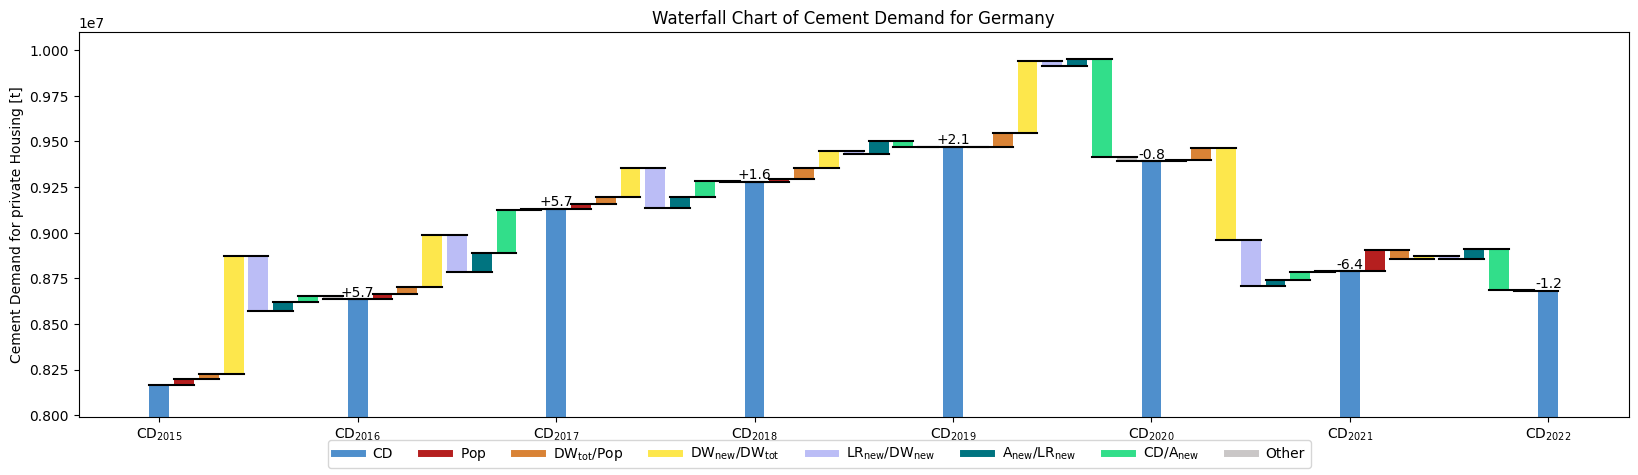

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

# start_years = [2015, 2019]
# end_years = [2019, 2022]

start_years = years[:-1]
end_years = years[1:]

labels = [
    f"$\\text{{CD}}_{{{start_years[0]}}}$",
]
colors = [color_cement]
percentage_change = [""]
values = []
bottoms = []
x = []

for i, (start, end) in enumerate(zip(start_years, end_years)):
    new_values = [data.loc[start, "CD"]] + [
        calc_cd(factor, start=start, end=end) for factor in ipat_factors
    ]
    difference = data.loc[end, "CD"] - sum(new_values)
    new_values.append(difference)

    x += np.linspace(i, i + 1, len(new_values), endpoint=False).tolist()

    y = 0
    for val in new_values:
        bottoms.append(y)
        y += val

    values += new_values

    labels += [f"$\\text{{CD}}_{{{end}}}$"]
    colors += [*colors_ipat, color_other, color_cement]
    # percentage_change += (
    #     [
    #         f"{calc_change(factor, start=start, end=end)*100:+2.1f}"
    #         for factor in ipat_factors
    #     ]
    #     + [f"{difference / data.loc[start, 'CD'] *  100:+2.1f}"]
    #     + [f"{calc_change('CD', start=start, end=end)*100:+2.1f}"]
    # )
    
    percentage_change += [""] * (len(ipat_factors) + 1) + [f"{calc_change('CD', start=start, end=end)*100:+2.1f}"]
    

values += [data.loc[end, "CD"]]
bottoms += [0]
x += [i + 1]

waterfall(
    ax,
    x,
    values,
    bottom=bottoms,
    text=percentage_change,
    colors=colors,
    labels=labels,
    title="Waterfall Chart of Cement Demand for Germany",
    ylim=(7.99e6, 1.01e7),
)

legend_line_width = 5

ax.plot([], [], color=color_cement, label="CD", linewidth=legend_line_width)
for label, color in zip(ipat_labels, colors_ipat):
    ax.plot([], [], color=color, label=label, linewidth=legend_line_width)

ax.plot([], [], color=color_other, label="Other", linewidth=legend_line_width)

ax.set_ylabel("Cement Demand for private Housing [t]")

fig.legend(
    ax.get_legend_handles_labels()[0],
    ax.get_legend_handles_labels()[1],
    loc="lower center",
    ncol=8,
)

fig.savefig("waterfall_2.png")

plt.show()

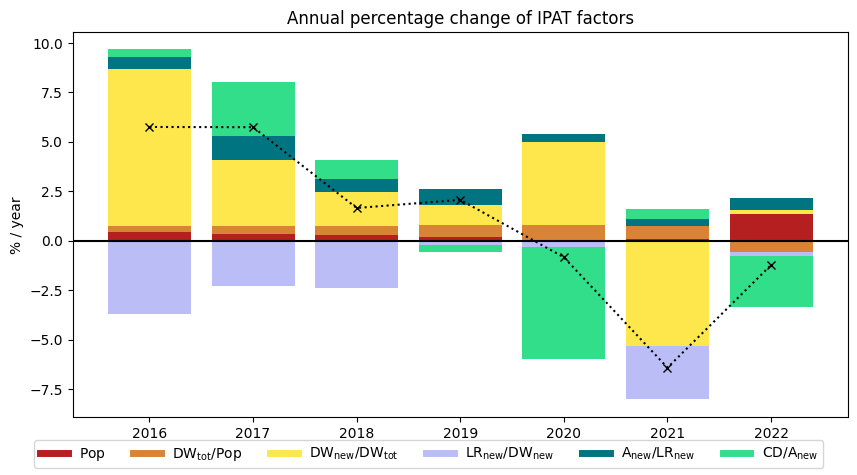

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

labels = [
    r"$\text{CD}_{2015}$",
]
colors = []
percentage_change = []
values = []
bottoms = []
x = []

for i in range(7):
    start = years[i]
    end = years[i + 1]
    new_values = [
        calc_change(factor, start=start, end=end) *100 for factor in ipat_factors
    ]
    # difference = data.loc[end, "CD"] - sum(new_values)
    # new_values.append(difference)
    
    percentage_change += [calc_change('CD', start=start, end=end)*100]
    
    x += [i] * len(new_values)
    
    y_plus = 0
    y_minus = 0
    for val in new_values:
        if val < 0:
            bottoms.append(y_minus)
            y_minus += val
        else:
            bottoms.append(y_plus)
            y_plus += val
    
    values += new_values
    
    labels += [f"$\\text{{CD}}_{{{start}}}$"]
    colors += colors_ipat

ax.bar(x, values, bottom=bottoms, color=colors)
ax.plot(np.arange(len(percentage_change)), percentage_change, 'x:', color='black')
ax.axline((0, 0), (1, 0), c='black')

legend_line_width = 5

for label, color in zip(ipat_labels, colors_ipat):
    ax.plot([], [], color=color, label=label, linewidth=legend_line_width)

ax.set_ylabel("% / year")
ax.set_title("Annual percentage change of IPAT factors")

ax.set_xticks(list(range(len(years[1:]))))
ax.set_xticklabels(years[1:]) 

fig.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1], loc="lower center", ncol=7)

fig.savefig("change.png")

plt.show()